# EDA of Netflix Top 10 Shows Using Python Functions And Statistics

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as st

### 1) Uploading The Dataset

In [2]:
df=pd.read_csv('netflix daily top 10.csv')
df.shape

(7100, 10)

#### The no. of rows are 7,100 and columns are 10

In [3]:
df.head()

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,NaN,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55


In [4]:
df.tail()

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
7095,2022-03-11,6,5,1,Worst Roommate Ever,TV Show,Yes,"Mar 1, 2022",10,81
7096,2022-03-11,7,7,2,Vikings: Valhalla,TV Show,Yes,"Feb 25, 2022",14,100
7097,2022-03-11,8,8,-,Shooter,Movie,NaN,"Aug 1, 2014",3,7
7098,2022-03-11,9,9,7,Shrek 2,Movie,NaN,"Mar 1, 2022",10,33
7099,2022-03-11,10,10,-,Shrek,Movie,NaN,"May 1, 2018",7,12


In [5]:
df.columns

Index(['As of', 'Rank', 'Year to Date Rank', 'Last Week Rank', 'Title', 'Type',
       'Netflix Exclusive', 'Netflix Release Date', 'Days In Top 10',
       'Viewership Score'],
      dtype='object')

In [6]:
df.dtypes

As of                   object
Rank                     int64
Year to Date Rank       object
Last Week Rank          object
Title                   object
Type                    object
Netflix Exclusive       object
Netflix Release Date    object
Days In Top 10           int64
Viewership Score         int64
dtype: object

In [7]:
df.count()

As of                   7100
Rank                    7100
Year to Date Rank       7100
Last Week Rank          7100
Title                   7100
Type                    7100
Netflix Exclusive       4599
Netflix Release Date    7100
Days In Top 10          7100
Viewership Score        7100
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   As of                 7100 non-null   object
 1   Rank                  7100 non-null   int64 
 2   Year to Date Rank     7100 non-null   object
 3   Last Week Rank        7100 non-null   object
 4   Title                 7100 non-null   object
 5   Type                  7100 non-null   object
 6   Netflix Exclusive     4599 non-null   object
 7   Netflix Release Date  7100 non-null   object
 8   Days In Top 10        7100 non-null   int64 
 9   Viewership Score      7100 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 554.8+ KB


### 2) Dropping Duplicates

In [9]:
df.duplicated().sum()

0

#### There are no duplicate values present in our database

### 3) Renaming columns

In [10]:
df.rename(columns={'Netflix Release Date':'Netflix Date'},inplace=True)
df.rename(columns={'Year to Date Rank':'Yr-Date Rank'},inplace=True)
df.rename(columns={'Netflix Exclusive':'Netflix Excl.'},inplace=True)

In [11]:
df.head()

,As of,Rank,Yr-Date Rank,Last Week Rank,Title,Type,Netflix Excl.,Netflix Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,NaN,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55


### 4) Checking For Null Values

In [12]:
df.isnull().sum()

As of                  0
Rank                   0
Yr-Date Rank           0
Last Week Rank         0
Title                  0
Type                   0
Netflix Excl.       2501
Netflix Date           0
Days In Top 10         0
Viewership Score       0
dtype: int64

#### It is observed that only the column 'Netflix Exclusive' has 2501 NAN values. These don't affect the analysis, so we will consider these as NA.

In [13]:
df['Netflix Excl.']=df['Netflix Excl.'].fillna('NA')
df.head()

,As of,Rank,Yr-Date Rank,Last Week Rank,Title,Type,Netflix Excl.,Netflix Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,NA,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NA,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55


In [14]:
df.isnull().sum()

As of               0
Rank                0
Yr-Date Rank        0
Last Week Rank      0
Title               0
Type                0
Netflix Excl.       0
Netflix Date        0
Days In Top 10      0
Viewership Score    0
dtype: int64

In [15]:
df['Netflix Excl.'].value_counts()

Yes    4599
NA     2501
Name: Netflix Excl., dtype: int64

#### Null values have been removed 

### 5) Replacing Values In A Column

In [16]:
df['Yr-Date Rank'].value_counts()

-     859
1     708
2     708
3     706
4     705
5     699
6     675
7     633
8     554
9     481
10    372
Name: Yr-Date Rank, dtype: int64

In [17]:
df['Yr-Date Rank']=df['Yr-Date Rank'].replace({'-':0})
df['Yr-Date Rank'].value_counts()

0     859
1     708
2     708
3     706
4     705
5     699
6     675
7     633
8     554
9     481
10    372
Name: Yr-Date Rank, dtype: int64

In [18]:
df['Last Week Rank'].value_counts()

-     3968
1      653
2      564
3      452
4      336
5      282
6      240
7      193
8      167
9      133
10     112
Name: Last Week Rank, dtype: int64

In [19]:
df['Last Week Rank']=df['Last Week Rank'].replace({'-':0})
df['Last Week Rank'].value_counts()

0     3968
1      653
2      564
3      452
4      336
5      282
6      240
7      193
8      167
9      133
10     112
Name: Last Week Rank, dtype: int64

### 6) Converting Datatypes Of Columns

In [20]:
df.dtypes

As of               object
Rank                 int64
Yr-Date Rank        object
Last Week Rank      object
Title               object
Type                object
Netflix Excl.       object
Netflix Date        object
Days In Top 10       int64
Viewership Score     int64
dtype: object

In [21]:
df['Last Week Rank']=df['Last Week Rank'].astype('int64')
df['Yr-Date Rank']=df['Yr-Date Rank'].astype('int64')

In [22]:
df['As of']=pd.to_datetime(df['As of'])
df['Netflix Date']=pd.to_datetime(df['Netflix Date'])

In [23]:
df.dtypes

As of               datetime64[ns]
Rank                         int64
Yr-Date Rank                 int64
Last Week Rank               int64
Title                       object
Type                        object
Netflix Excl.               object
Netflix Date        datetime64[ns]
Days In Top 10               int64
Viewership Score             int64
dtype: object

### 7) Visualization

### a) Represent Yr-Date rank on a count plot

C:\Users\niksm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


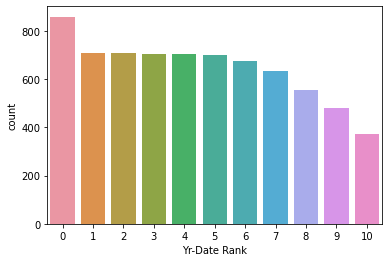

In [24]:
sns.countplot(df['Yr-Date Rank'])
plt.show()

### b) Depict five point summary of 'Last Week Rank' greater than 7

In [25]:
a=df[df['Last Week Rank']>7]
print(a.shape)
a.head()

(412, 10)


,As of,Rank,Yr-Date Rank,Last Week Rank,Title,Type,Netflix Excl.,Netflix Date,Days In Top 10,Viewership Score
109,2020-04-11,10,9,8,Nailed It!,TV Show,Yes,2018-03-09,10,33
113,2020-04-12,4,3,9,Angel Has Fallen,Movie,NA,2020-04-04,8,51
139,2020-04-14,10,0,10,Legacies,TV Show,NA,2019-04-05,7,15
253,2020-04-26,4,5,9,Waco,TV Show,NA,2020-04-16,8,48
379,2020-05-08,10,0,9,Ozark,TV Show,Yes,2017-07-21,37,247


C:\Users\niksm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


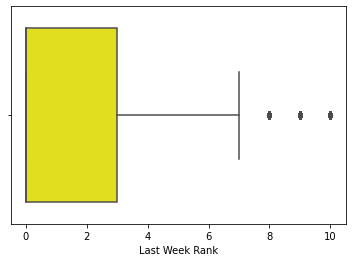

In [26]:
sns.boxplot(df['Last Week Rank'],color='yellow')
plt.show()

### 8) a) Outlier Handling

### Let us consider the column of Viewership Score

In [27]:
q1=df['Viewership Score'].quantile(0.25)
q2=df['Viewership Score'].quantile(0.5)
q3=df['Viewership Score'].quantile(0.75)
iqr=q3-q1
df_max=q3+(1.5*iqr)
df_min=q1-(1.5*iqr)
print(q1)
print(q2)
print(q3)
print(iqr)
print(df_max)
print(df_min)

19.0
50.0
128.0
109.0
291.5
-144.5


C:\Users\niksm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


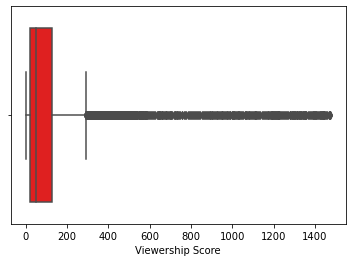

In [28]:
sns.boxplot(df['Viewership Score'],color='red')
plt.show()

***For the attribute 'Viewership Score', the five point summary shows that minimum is -144.5 and maximum is 291.5. 
Since Viewership Score has positive numerical values only, so the outliers lie beyond max(291.5) as can be seen in the above boxplot.***

### b) Outlier Treatment

In [29]:
ot=df['Viewership Score'].clip(upper=df_max,inplace=True)
ot

C:\Users\niksm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


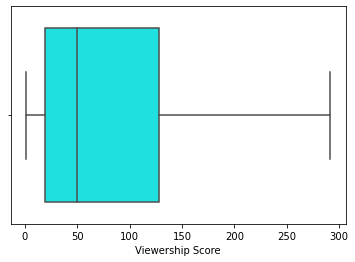

In [30]:
sns.boxplot(df['Viewership Score'],color='cyan')
plt.show()

***We handle the outliers by replacing the outlier values with that of maximum in the column 'Viewership Score' 
as performed above***

### 9) Missing Values

In [31]:
df.isna().sum()

As of               0
Rank                0
Yr-Date Rank        0
Last Week Rank      0
Title               0
Type                0
Netflix Excl.       0
Netflix Date        0
Days In Top 10      0
Viewership Score    0
dtype: int64

#### There are no missing values in our dataset as well

### 10) Other Insights And Analysis

### a) Display performance of Type (or genre) on a count plot

In [32]:
a=df['Type'].value_counts()
a

TV Show            4446
Movie              2611
Stand-Up Comedy      41
Concert/Perf…         2
Name: Type, dtype: int64

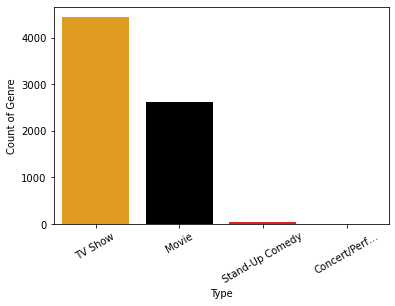

In [33]:
sns.countplot(x=df['Type'],palette=['orange','black','red','darkblue'])
plt.ylabel('Count of Genre')
plt.xticks(rotation=30)
plt.show()

#### TV shows was the first choice of viewers followed by movies (with possible reason being their short duration) in Netflix

###  b) The  most watched  'Title' basis 'Days in Top 10'

In [34]:
b=df.groupby(['Title'])['Days In Top 10'].max().sort_values(ascending=False)
b

Title
Cocomelon                     428
Ozark                          89
Cobra Kai                      81
Manifest                       80
The Queenâs Gambit           73
                             ... 
Dark Shadows                    1
Elves                           1
Rango                           1
One on One                      1
Jojoâs Bizarre Adventure      1
Name: Days In Top 10, Length: 645, dtype: int64

#### Among the 645 titles, COCOMELON  is the most popular appearing 428 times and the only one beyond 100 times

### c) Percentage distribution in 'Viewership Score' where frequency of viewing is of 60 or above

In [35]:
c=b[b>60]
b

Title
Cocomelon                     428
Ozark                          89
Cobra Kai                      81
Manifest                       80
The Queenâs Gambit           73
                             ... 
Dark Shadows                    1
Elves                           1
Rango                           1
One on One                      1
Jojoâs Bizarre Adventure      1
Name: Days In Top 10, Length: 645, dtype: int64

C:\Users\niksm\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\niksm\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\niksm\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\niksm\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0, flags=flags)


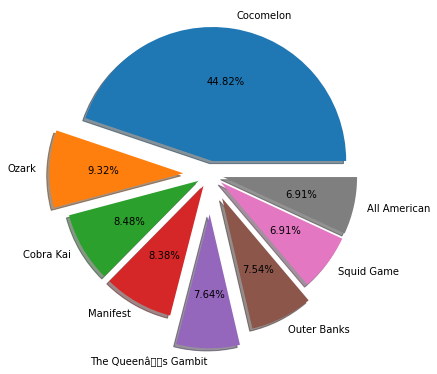

In [36]:
plt.figure(figsize=(6,7))
plt.pie(c.values,labels=c.index,autopct='%.2f%%',shadow=True,explode=(0.1,0.2,0.1,0.1,0.3,0.2,0.1,0.1))
plt.show()

#### The pie chart explains that approxiately 44.82% viewership is occupied by Cocomelon and Ozark is second with 9.32%


### d) Depict the distribution of Rank vs Type 

In [37]:
f=df.groupby(['Rank'])['Type'].value_counts()
f

Rank  Type           
1     TV Show            494
      Movie              216
2     TV Show            475
      Movie              230
      Stand-Up Comedy      4
      Concert/Perf…        1
3     TV Show            430
      Movie              270
      Stand-Up Comedy     10
4     TV Show            432
      Movie              271
      Stand-Up Comedy      7
5     TV Show            423
      Movie              283
      Stand-Up Comedy      3
      Concert/Perf…        1
6     TV Show            442
      Movie              266
      Stand-Up Comedy      2
7     TV Show            437
      Movie              271
      Stand-Up Comedy      2
8     TV Show            435
      Movie              270
      Stand-Up Comedy      5
9     TV Show            441
      Movie              265
      Stand-Up Comedy      4
10    TV Show            437
      Movie              269
      Stand-Up Comedy      4
Name: Type, dtype: int64

<Figure size 288x360 with 0 Axes>

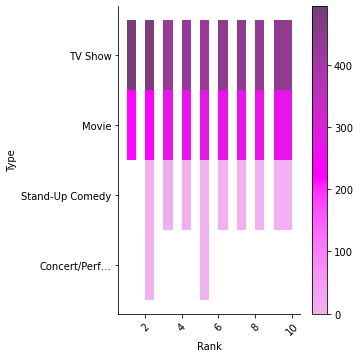

In [38]:
plt.figure(figsize=(4,5))
sns.displot(x=df['Rank'],y=df['Type'],cbar=True,color='purple')
plt.xticks(rotation=45)
plt.show()

#### The latest observation is that TV SHOWS have dominated at every rank due to strength in numbers as well 

### e) Descriptive Analysis

In [39]:
ds=df.describe()
ds

,Rank,Yr-Date Rank,Last Week Rank,Days In Top 10,Viewership Score
count,7100.000000,7100.000000,7100.000000,7100.000000,7100.000000
mean,5.500000,4.439296,1.737324,24.123662,88.546901
std,2.872484,3.041267,2.620020,58.473789,92.350549
min,1.000000,0.000000,0.000000,1.000000,1.000000
25%,3.000000,2.000000,0.000000,3.000000,19.000000
50%,5.500000,4.000000,0.000000,7.000000,50.000000
75%,8.000000,7.000000,3.000000,18.000000,128.000000
max,10.000000,10.000000,10.000000,428.000000,291.500000


#### This means that:
***1) The best rank a title/show has recieved is 1 and lowest is 10.***<br>
***2) The minimum no. of days any title was in Top 10 in Netflix is 1 and maximum is 428 days.***<br>
***3) Similarly, the lowest viewership score is 1 and max is 1474.***

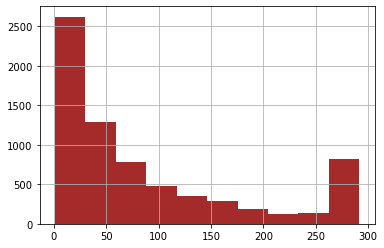

In [40]:
plt.hist(df['Viewership Score'],color='brown')
plt.grid(True)
plt.show()

In [41]:
z1=df.describe(include='all')
z1

C:\Users\niksm\AppData\Local\Temp/ipykernel_9108/2219736383.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  z1=df.describe(include='all')


,As of,Rank,Yr-Date Rank,Last Week Rank,Title,Type,Netflix Excl.,Netflix Date,Days In Top 10,Viewership Score
count,7100,7100.000000,7100.000000,7100.000000,7100,7100,7100,7100,7100.000000,7100.000000
unique,710,NaN,NaN,NaN,645,4,2,414,NaN,NaN
top,2020-04-01 00:00:00,NaN,NaN,NaN,Cocomelon,TV Show,Yes,2020-06-01 00:00:00,NaN,NaN
freq,10,NaN,NaN,NaN,428,4446,4599,438,NaN,NaN
first,2020-04-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2007-01-15 00:00:00,NaN,NaN
last,2022-03-11 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-04 00:00:00,NaN,NaN
mean,NaN,5.500000,4.439296,1.737324,NaN,NaN,NaN,NaN,24.123662,88.546901
std,NaN,2.872484,3.041267,2.620020,NaN,NaN,NaN,NaN,58.473789,92.350549
min,NaN,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,1.000000,1.000000
25%,NaN,3.000000,2.000000,0.000000,NaN,NaN,NaN,NaN,3.000000,19.000000


***The above code shows all the details of the categorical and numerical columns. 'Include' in describe() allows for 
inclusion of categorical attributes along with numerical ones in five point summary or similar format***

### f) Checking for correlation between columns (if any)

In [42]:
g=df.corr()
g

,Rank,Yr-Date Rank,Last Week Rank,Days In Top 10,Viewership Score
Rank,1.000000,0.607892,0.315619,0.156179,0.007036
Yr-Date Rank,0.607892,1.000000,0.332713,0.185010,0.121308
Last Week Rank,0.315619,0.332713,1.000000,0.463955,0.511232
Days In Top 10,0.156179,0.185010,0.463955,1.000000,0.630953
Viewership Score,0.007036,0.121308,0.511232,0.630953,1.000000


***Since correlation matrix lies between the range of -1 and 1, there is no negative correlation here as none of the values are
negative. Furthur, the maximum value in positive zone which is less than 1 for any attribute is around 0.6.***

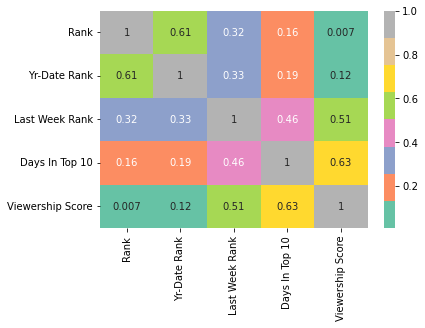

In [43]:
sns.heatmap(g,annot=True,cmap='Set2')
plt.show()

### g) Top 15 movies based on Viewership score

In [44]:
movies=df[df['Type']=='Movie']
Top_15=movies.groupby('Title')['Viewership Score'].max().sort_values(ascending=False)[0:16]
Top_15

Title
365 Days                          213.0
The Mitchells vs. The Machines    204.0
Donât Look Up                   189.0
The Unforgivable                  171.0
Vivo                              166.0
Red Notice                        162.0
We Can Be Heroes                  144.0
Hubie Halloween                   141.0
How the Grinch Stole Christmas    137.0
Project Power                     134.0
The Christmas Chronicles 2        132.0
Fatherhood                        129.0
Yes Day                           126.0
Wish Dragon                       125.0
Home                              123.0
American Murder: The Family…      117.0
Name: Viewership Score, dtype: float64

### h) Netflix Exclusive with yes in Days in top 10 arranged by netflix date

In [45]:
output=df[df['Netflix Excl.']=='Yes']
output_1=output.groupby('Days In Top 10').max().sort_values(by='Netflix Date',ascending=True)
output_1

,As of,Rank,Yr-Date Rank,Last Week Rank,Title,Type,Netflix Excl.,Netflix Date,Viewership Score
Days In Top 10,,,,,,,,,
89,2022-03-01,7,7,8,Ozark,TV Show,Yes,2017-07-21,291.5
74,2022-02-14,7,6,3,Ozark,TV Show,Yes,2017-07-21,291.5
75,2022-02-15,5,7,3,Ozark,TV Show,Yes,2017-07-21,291.5
76,2022-02-16,5,5,3,Ozark,TV Show,Yes,2017-07-21,291.5
77,2022-02-17,5,5,3,Ozark,TV Show,Yes,2017-07-21,291.5
...,...,...,...,...,...,...,...,...,...
5,2022-03-09,10,10,9,Ãlite,TV Show,Yes,2022-03-04,50.0
4,2022-03-08,10,10,5,Ãlite,TV Show,Yes,2022-03-04,40.0
3,2022-03-07,10,10,9,Ãlite,TV Show,Yes,2022-03-04,30.0


### i) Stand up comedy which occurs in Netflix Top 10 for the most time.

In [46]:
comedy = df[df['Type'] == 'Stand-Up Comedy']
c_1=comedy.groupby(['Title'])['Days In Top 10'].max().sort_values(ascending=False)
c_1

Title
Dave Chappelle: The Closer        16
Kevin Hart: Zero F**ks Given      10
George Lopez: Weâll Do It f…     5
Jerry Seinfeld: 23 Hours to…       5
Chris DâElia: No Pain            3
Bo Burnham: Inside                 2
Name: Days In Top 10, dtype: int64

***It can be seen that Dave Chappelle and Kevin Hart are the only two comedians with their shows with a stay in the Top 10 for 10 days or more***

### j) Fetch details of concert performances that were in netflix exclusives

In [69]:
n=df[df['Type'] == 'Concert/Perf…']
n

,As of,Rank,Yr-Date Rank,Last Week Rank,Title,Type,Netflix Excl.,Netflix Date,Days In Top 10,Viewership Score
2651,2020-12-22,2,0,0,"Ariana Grande: Excuse Me, I…",Concert/Perf…,Yes,2020-12-21,1,9.0
2664,2020-12-23,5,2,0,"Ariana Grande: Excuse Me, I…",Concert/Perf…,Yes,2020-12-21,2,15.0


In [72]:
a=df['Type']=='Concert/Perf…'
b=df['Days In Top 10']

C:\Users\niksm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


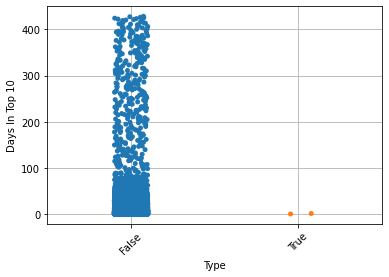

In [75]:
sns.stripplot(a,b)
plt.xticks(rotation=45)
plt.grid()
plt.show()

***As above strip plot shows  that only 2 performances of Ariana Grande made it to top 10 which were Neflix exclusives***